# Analysis Of Online Shoppers Intention

### Introduction:
What is the dataset all about?

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided from a top ecommerce site. The data set was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

### Our Goal:
The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website. This dataset has very few missing values and all features of the dataset are relevant to the purchasing intention based on inference.


## Feature Description

- Administrative: This is the number of pages of this type (administrative) that the user visited.
- Administrative_Duration: This is the amount of time spent in this category of pages.
- Informational: This is the number of pages of this type (informational) that the user visited.
- Informational_Duration: This is the amount of time spent in this category of pages.
- ProductRelated: This is the number of pages of this type (product related) that the user visited.
- ProductRelated_Duration: This is the amount of time spent in this category of pages.
- BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional     tasks.
- ExitRates: The percentage of pageviews on the website that end at that specific page.
- PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce     transaction.
- More information about how this is calculated
- SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or         	 Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is  		  	calculated below.
- Month: Contains the month the pageview occurred, in string form.
- OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.
- Browser: An integer value representing the browser that the user was using to view the page.
- Region: An integer value representing which region the user is located in.
- TrafficType: An integer value representing what type of traffic the user is categorized into.
- VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
- Weekend: A boolean representing whether the session is on a weekend.
- Revenue: A boolean representing whether or not the user completed the purchase.


In [1]:
#import python libraries for data manipulation and visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from sklearn import metrics
from scipy.stats import norm
import statistics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
pwd()

'C:\\Users\\Babadele\\Documents\\MY PROJECT PORTFOLIO\\PYTHON'

### Data Inspection 

In [5]:
data_shoppers = pd.read_csv(r"C:\Users\Babadele\Documents\10Alytics Training and Internship\INTERNSHIP PROJECTS\Task2_Dataset\Online Shoppers Intention\Online Shoppers Intention\online_shoppers_intention.csv")

data_shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
#inspect the data
print("There are  {0} Rows and {1} Columns data".format(data_shoppers.shape[0],data_shoppers.shape[1]))

There are  12330 Rows and 18 Columns data


### Checking The Feature Values and Data Types

In [7]:
# Check The Datatypes

data_shoppers.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
# We use info() method to check columns and datatypes of each column in our data set 
data_shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
data_shoppers['Administrative'].unique()

array([ 0,  1,  2,  4, 12,  3, 10,  6,  5,  9,  8, 16, 13, 11,  7, 18, 14,
       17, 19, 15, 24, 22, 21, 20, 23, 27, 26], dtype=int64)

In [10]:
data_shoppers['Informational'].unique()

array([ 0,  1,  2,  4, 16,  5,  3, 14,  6, 12,  7,  9, 10,  8, 11, 24, 13],
      dtype=int64)

In [11]:
data_shoppers['ProductRelated'].unique()

array([  1,   2,  10,  19,   0,   3,  16,   7,   6,  23,  13,  20,   8,
         5,  32,   4,  45,  14,  52,   9,  46,  15,  22,  11,  12,  36,
        42,  27,  90,  18,  38,  17, 128,  25,  30,  21,  51,  26,  28,
        31,  24,  50,  96,  49,  68,  98,  67,  55,  35,  37,  29,  34,
        71,  63,  87,  40,  33,  54,  64,  75,  39, 111,  81,  61,  47,
        44,  88, 149,  41,  79,  66,  43, 258,  80,  62,  83, 173,  48,
        58,  57,  56,  69,  82,  59, 109, 287,  53,  84,  78, 137, 113,
        89,  65,  60, 104, 129,  77,  74,  93,  76,  72, 194, 140, 110,
       132, 115,  73, 328, 160,  86, 150,  95, 130, 151, 117, 124, 127,
       125, 116, 105,  92, 157, 154, 220, 187, 112, 131, 159,  94, 204,
       142, 206, 102, 313, 145,  85,  97, 198, 181, 126, 106, 101, 108,
       119,  70, 122,  91, 276, 100, 291, 114, 172, 217, 141, 133, 156,
       136, 180, 135, 195,  99, 362, 179, 118, 175, 148, 440, 103, 178,
       184, 705, 134, 176, 146, 189, 120, 193, 222, 121, 107, 30

In [12]:
data_shoppers['SpecialDay'].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

In [13]:
data_shoppers['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [14]:
data_shoppers['OperatingSystems'].unique()

array([1, 2, 4, 3, 7, 6, 8, 5], dtype=int64)

In [15]:
data_shoppers['Browser'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64)

In [16]:
data_shoppers['Region'].nunique()

9

In [17]:
data_shoppers['TrafficType'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20], dtype=int64)

In [18]:
data_shoppers['TrafficType'].nunique()

20

In [19]:
data_shoppers['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [20]:
data_shoppers['Weekend'].unique()

array([False,  True])

In [21]:
data_shoppers['Revenue'].unique()

array([False,  True])

### Data Types Transformation
We have to transform 'Revenue' and 'Weekend' features from boolean into binary making them suitable for calculations.

In [22]:
data_shoppers.Revenue = data_shoppers.Revenue.astype('int')
data_shoppers.Weekend = data_shoppers.Weekend.astype('int')

In [23]:
data_shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Check for Missing Values

In [24]:
# Check for missing values
data_shoppers.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Statistical/Descriptive  Analysis

In [25]:
# Check the Descriptive Statistics
data_shoppers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


In [26]:
data_shoppers.describe().astype(int)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330
mean,2,80,0,34,31,1194,0,0,5,0,2,2,3,4,0,0
std,3,176,1,140,44,1913,0,0,18,0,0,1,2,4,0,0
min,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
25%,0,0,0,0,7,184,0,0,0,0,2,2,1,2,0,0
50%,1,7,0,0,18,598,0,0,0,0,2,2,3,2,0,0
75%,4,93,0,0,38,1464,0,0,0,0,3,2,4,4,0,0
max,27,3398,24,2549,705,63973,0,0,361,1,8,13,9,20,1,1


In [27]:
data_shoppers.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [28]:
data_shoppers.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,NaN,NaN
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,0.000000,0.000000


### Correlation Analysis with Visualization 

In [29]:
data_shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


<AxesSubplot:>

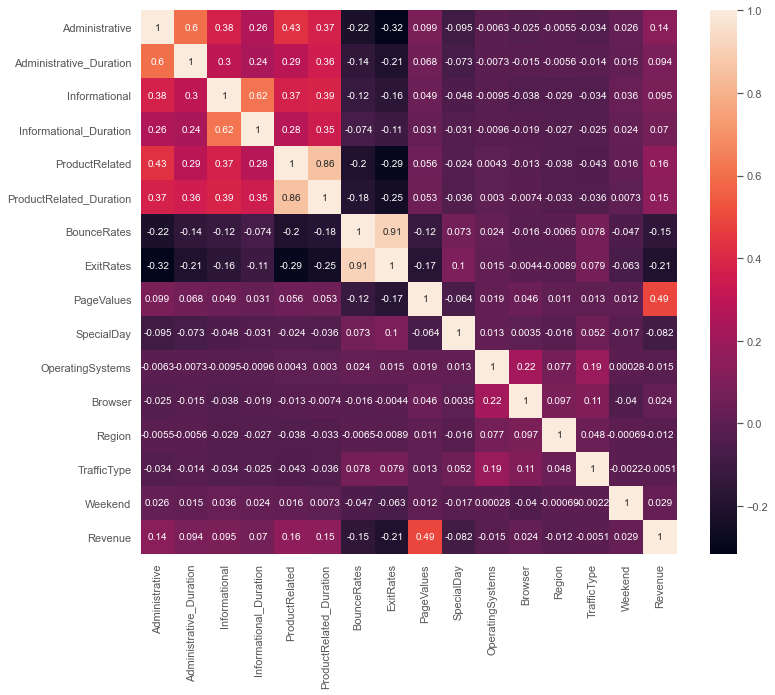

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(data_shoppers.corr(), annot=True)

In [31]:
data_shoppers.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


### Correlation Observations

- In general, there is very little correlation among the different features in our dataset.
- The very few cases of high correlation (|corr| >= 0.7) are:
  BounceRates & ExitRates (0.9).
  ProductRelated & ProductRelated_Duration (0.9).
- Moderate Correlations (0.3 < |corr| < 0.7) are found 
  Among the following features: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated,   and ProductRelated_Duration.
- Also between PageValues and Revenue.


### Visualize The Correlations 

In [32]:
#sns.pairplot(data_shoppers)

NameError: name 'suptitle' is not defined

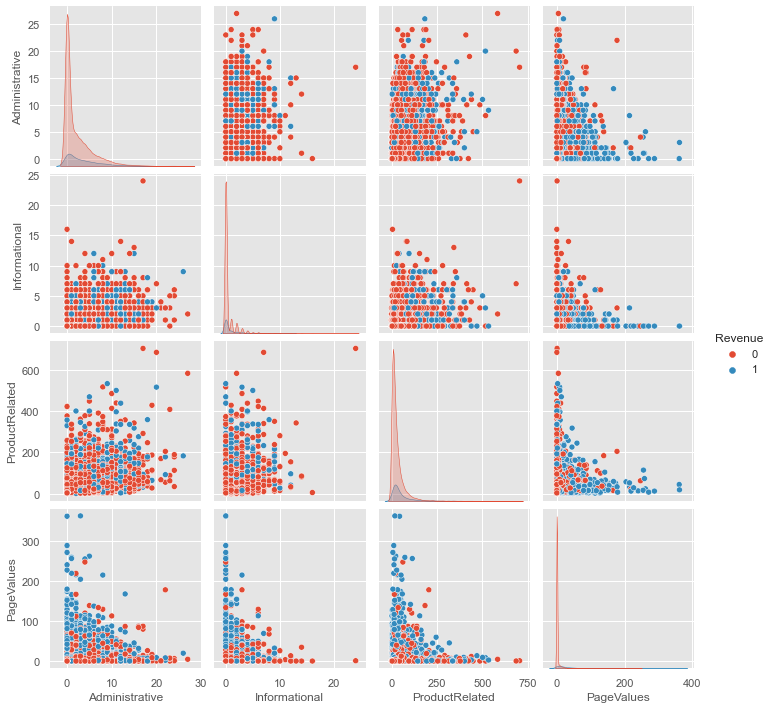

In [33]:
sns.pairplot(data_shoppers[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
suptitle('Feature Relations')
plt.show()

- From the above figure, we can see:

- No strong correlation between Revenue (our target) and any other feature.
- A strong negative correlation between PageValues and other features shown.

### Some Univariate Analysis And Visualizing The Distribution Of Features

Text(0, 0.5, 'COUNT')

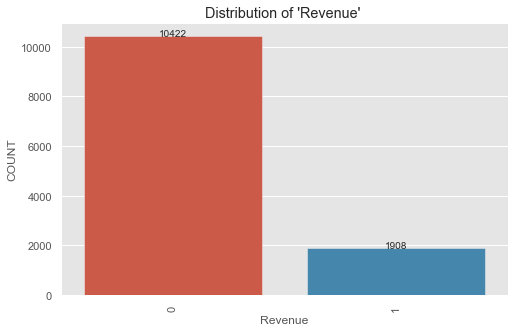

In [34]:
# Checking Distribution of Data set by Columns
# Looking at 'Revenue' Distribution
fig, ax1 = plt.subplots(figsize = (8, 5))
viz = sns.countplot(ax=ax1, x='Revenue', data=data_shoppers)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution of 'Revenue' ")
plt.ylabel('COUNT')

In [35]:
# Percentage of Transaction that Lead to Revenue Generation 
(data_shoppers['Revenue'].value_counts()/data_shoppers.shape[0]*100).round(2)

0    84.53
1    15.47
Name: Revenue, dtype: float64

Text(0, 0.5, 'COUNT')

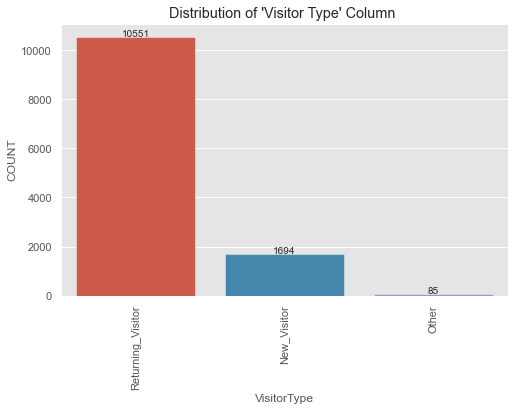

In [36]:
# Looking at 'Visitors Type' Distribution
fig, ax1 = plt.subplots(figsize = (8, 5))
viz = sns.countplot(ax=ax1, x='VisitorType', data=data_shoppers)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution of 'Visitor Type' Column ")
plt.ylabel('COUNT')

In [37]:
# Percentage Distribution Of Visitor Type 
(data_shoppers['VisitorType'].value_counts()/data_shoppers.shape[0]*100).round(2)

Returning_Visitor    85.57
New_Visitor          13.74
Other                 0.69
Name: VisitorType, dtype: float64

Text(0, 0.5, 'COUNT')

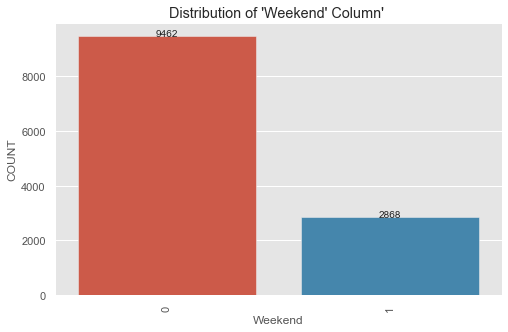

In [38]:
# Looking at the Distribution of 'Weekend' Column
fig, ax1 = plt.subplots(figsize = (8, 5))
viz = sns.countplot(ax=ax1, x='Weekend', data=data_shoppers)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution of 'Weekend' Column' ")
plt.ylabel('COUNT')

In [39]:
# Percentage Distribution Of The Days of the Week The Session took Place(Weekend or Others)

(data_shoppers['Weekend'].value_counts()/data_shoppers.shape[0]*100).round(2)

0    76.74
1    23.26
Name: Weekend, dtype: float64

Text(0, 0.5, 'COUNT')

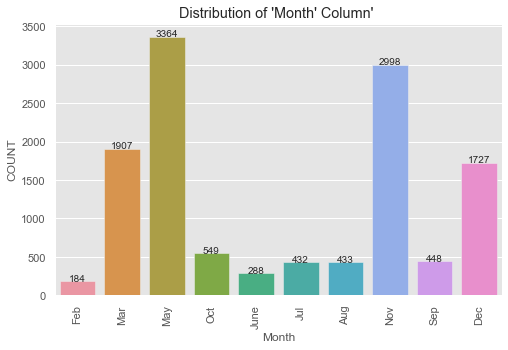

In [40]:
# Looking at the Distribution of 'Month' Column
fig, ax1 = plt.subplots(figsize = (8, 5))
viz = sns.countplot(ax=ax1, x='Month', data=data_shoppers)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution of 'Month' Column' ")
plt.ylabel('COUNT')

In [41]:
# Percentage Distribution Of 'Month' Column 
(data_shoppers['Month'].value_counts()/data_shoppers.shape[0]*100).round(2)

May     27.28
Nov     24.31
Mar     15.47
Dec     14.01
Oct      4.45
Sep      3.63
Aug      3.51
Jul      3.50
June     2.34
Feb      1.49
Name: Month, dtype: float64

C:\Users\Babadele\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administrative', ylabel='Density'>

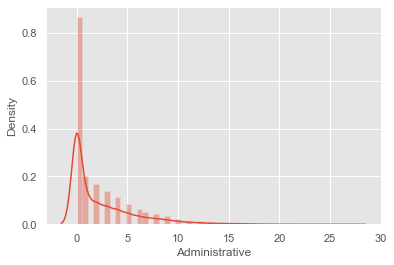

In [42]:
sns.distplot(data_shoppers['Administrative'])


In [43]:
(data_shoppers['Administrative'].value_counts()/data_shoppers.shape[0]*100).round(2)

0     46.78
1     10.98
2      9.03
3      7.42
4      6.20
5      4.66
6      3.50
7      2.74
8      2.33
9      1.82
10     1.24
11     0.85
12     0.70
13     0.45
14     0.36
15     0.31
16     0.19
17     0.13
18     0.10
19     0.05
22     0.03
24     0.03
23     0.02
21     0.02
20     0.02
27     0.01
26     0.01
Name: Administrative, dtype: float64

C:\Users\Babadele\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Informational', ylabel='Density'>

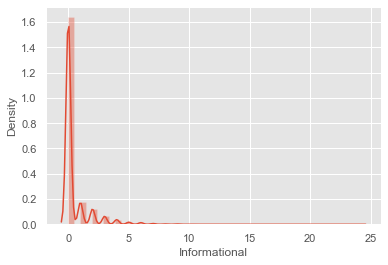

In [44]:
sns.distplot(data_shoppers['Informational'])

C:\Users\Babadele\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

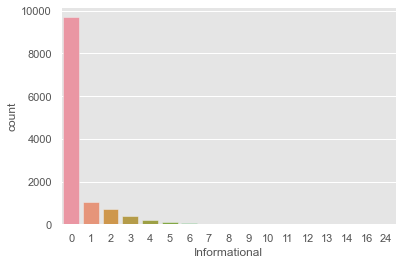

In [45]:
#Plot the unique values on Informational

sns.countplot(data_shoppers['Informational']).unique()

In [46]:
(data_shoppers['Informational'].value_counts()/data_shoppers.shape[0]*100).round(2)

0     78.66
1      8.44
2      5.90
3      3.08
4      1.80
5      0.80
6      0.63
7      0.29
9      0.12
8      0.11
10     0.06
12     0.04
14     0.02
24     0.01
16     0.01
11     0.01
13     0.01
Name: Informational, dtype: float64

In [47]:
data_shoppers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

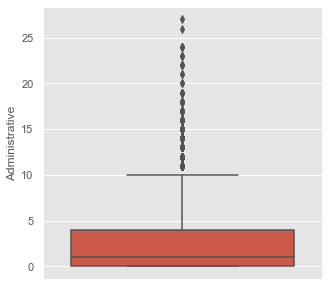

In [48]:
# Distribution of Administrative Column

plt.figure(figsize=(5,5))
sns.boxplot(y='Administrative', data=data_shoppers)
plt.show()

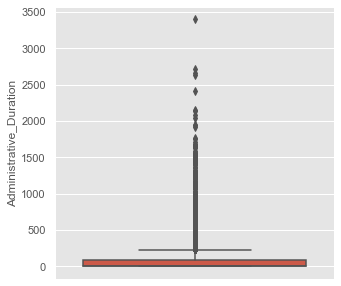

In [49]:
# Distribution of Administrative Duration

plt.figure(figsize=(5,5))
sns.boxplot(y='Administrative_Duration', data=data_shoppers)
plt.show()

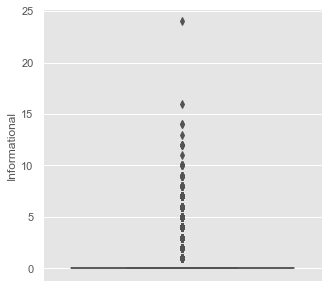

In [50]:
# Distribution of Informational Column

plt.figure(figsize=(5,5))
sns.boxplot(y='Informational', data=data_shoppers)
plt.show()

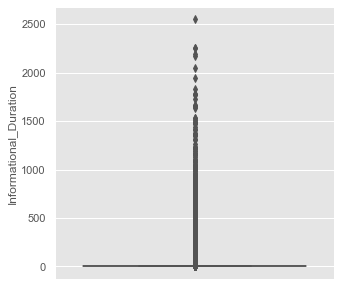

In [51]:
# Distribution of Informational Duration

plt.figure(figsize=(5,5))
sns.boxplot(y='Informational_Duration', data=data_shoppers)
plt.show()

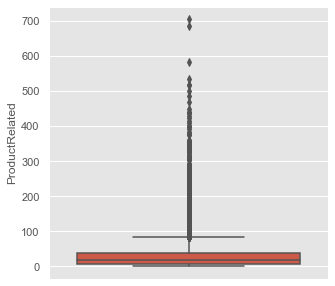

In [52]:
# Distribution of Product Related

plt.figure(figsize=(5,5))
sns.boxplot(y='ProductRelated', data=data_shoppers)
plt.show()

C:\Users\Babadele\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


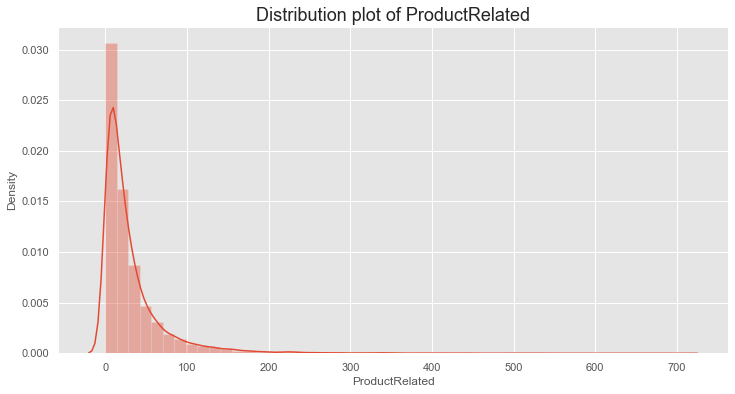

In [53]:
plt.figure(figsize=(12,6))
sns.distplot(data_shoppers['ProductRelated'])
plt.title('Distribution plot of ProductRelated', fontsize=18)
plt.show()

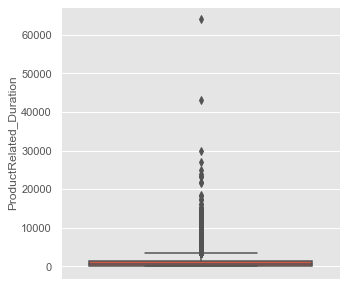

In [54]:
# Distribution of Product Related Duration

plt.figure(figsize=(5,5))
sns.boxplot(y='ProductRelated_Duration', data=data_shoppers)
plt.show()

In [55]:
data_shoppers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

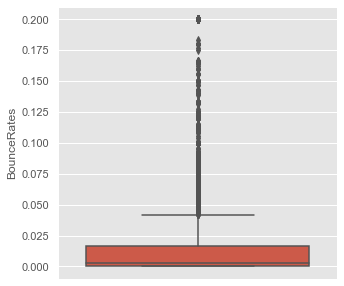

In [56]:
# Distribution of Bounce Rates

plt.figure(figsize=(5,5))
sns.boxplot(y='BounceRates', data=data_shoppers)
plt.show()

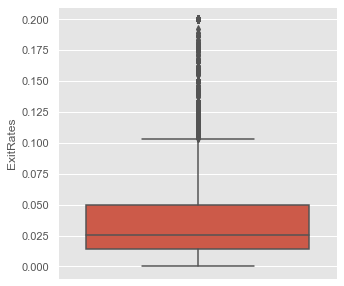

In [57]:
# Distribution of Exit Rates

plt.figure(figsize=(5,5))
sns.boxplot(y='ExitRates', data=data_shoppers)
plt.show()

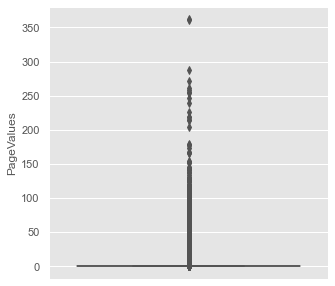

In [58]:
# Distribution of Page Values

plt.figure(figsize=(5,5))
sns.boxplot(y='PageValues', data=data_shoppers)
plt.show()

C:\Users\Babadele\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


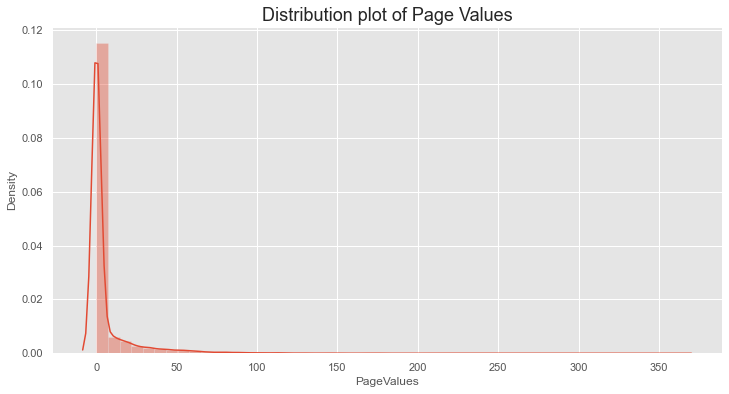

In [59]:
plt.figure(figsize=(12,6))
sns.distplot(data_shoppers['PageValues'])
plt.title('Distribution plot of Page Values', fontsize=18)
plt.show()

## Multivariate Analysis

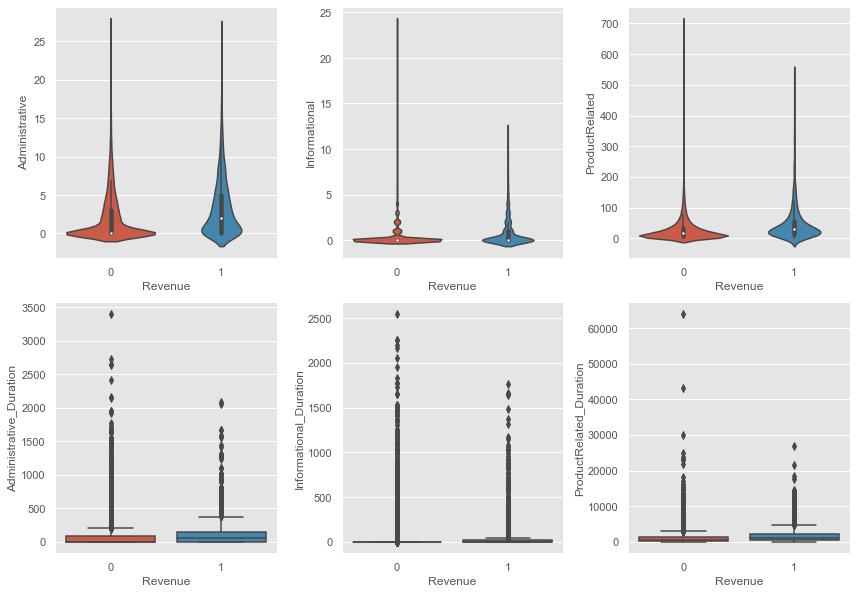

In [60]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)

sns.violinplot(data=data_shoppers, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=data_shoppers, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=data_shoppers, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=data_shoppers, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=data_shoppers, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=data_shoppers, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

From the above boxplots, we can see that:

In general, visitors tend to visit less pages, and spend less time, if they are not going to make a purchase.
The number of product related pages, and the time spent on them, is way higher than that for account related or informational pages.
The first 3 feature look like they follow a skewed normal distribution.
Page Metrics Analysis

### Page Analysis

C:\Users\Babadele\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Babadele\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Babadele\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

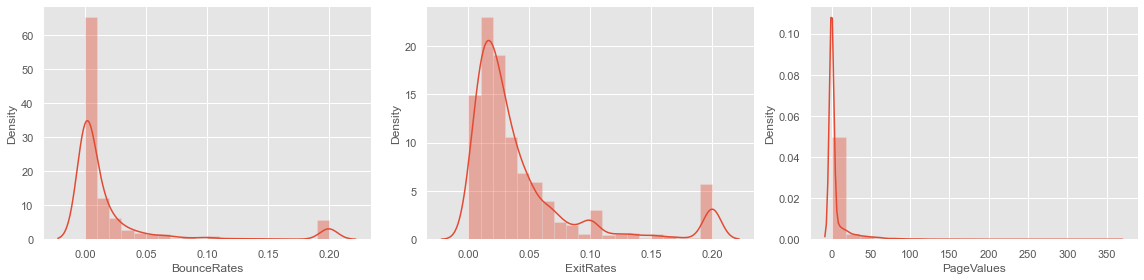

In [61]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(data_shoppers['BounceRates'], bins=20, ax=ax1)
sns.distplot(data_shoppers['ExitRates'], bins=20, ax=ax2)
sns.distplot(data_shoppers['PageValues'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

From the above visualizations, we can conclude:

- BounceRates & PageValues do not follow a normal distribution.
- All 3 features have distributions that are skewed right.
- All 3 distributions have a lot of outliers.
- The average bounce and exit rates of most of our data points is low, which is good, since high rates identicate that visitors   are not engaging with the website.
- Exit rate has more high values than bounce rate, which makes sense, where transaction confirmation pages for example will       cause the average exit rate to increase.
- Bounce rate ==> the percentage where the first page visited was the only page visited in that session.
- Exit rate of a page ==> The percentage where that page was the last page visited in the session, out of all visits to that     page.


### Visitor Analysis

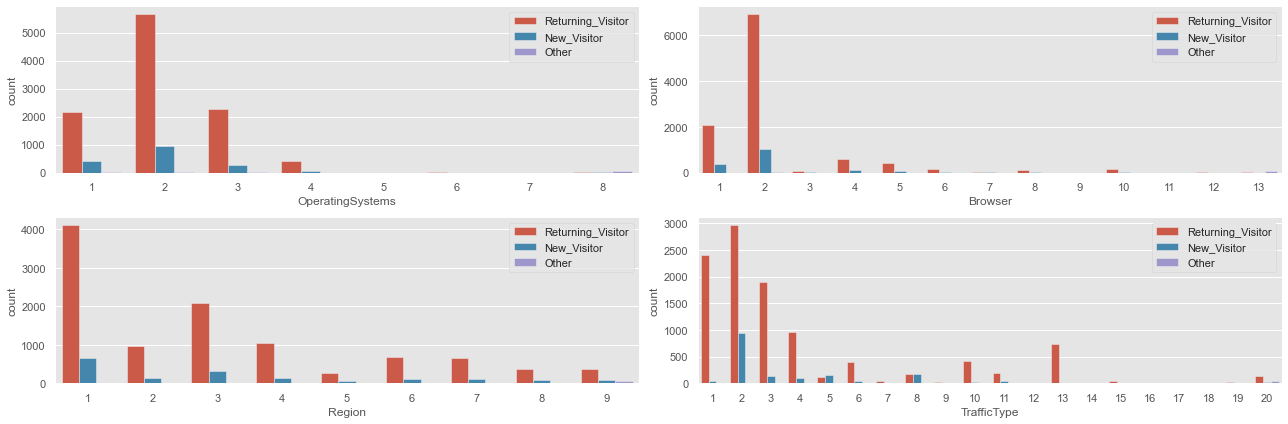

In [62]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=data_shoppers, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=data_shoppers, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=data_shoppers, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=data_shoppers, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

- 1 Operating system is responsible for ~7000 of the examples in our dataset.
- 4 of the 8 operating systems used, are responsible of a very small number (<200) of the examples in our dataset.
- A similar story repeated with the browsers used by visitors, where there is 1 dominant browser, 3 with decent representation   in the dataset, and the rest are rarey used.
- It looks like we have a very regionally diverse traffic in our dataset.
- Also Traffic sources are very diverse, with a few that did not contribute much to the dataset.


### Visit Date Analysis

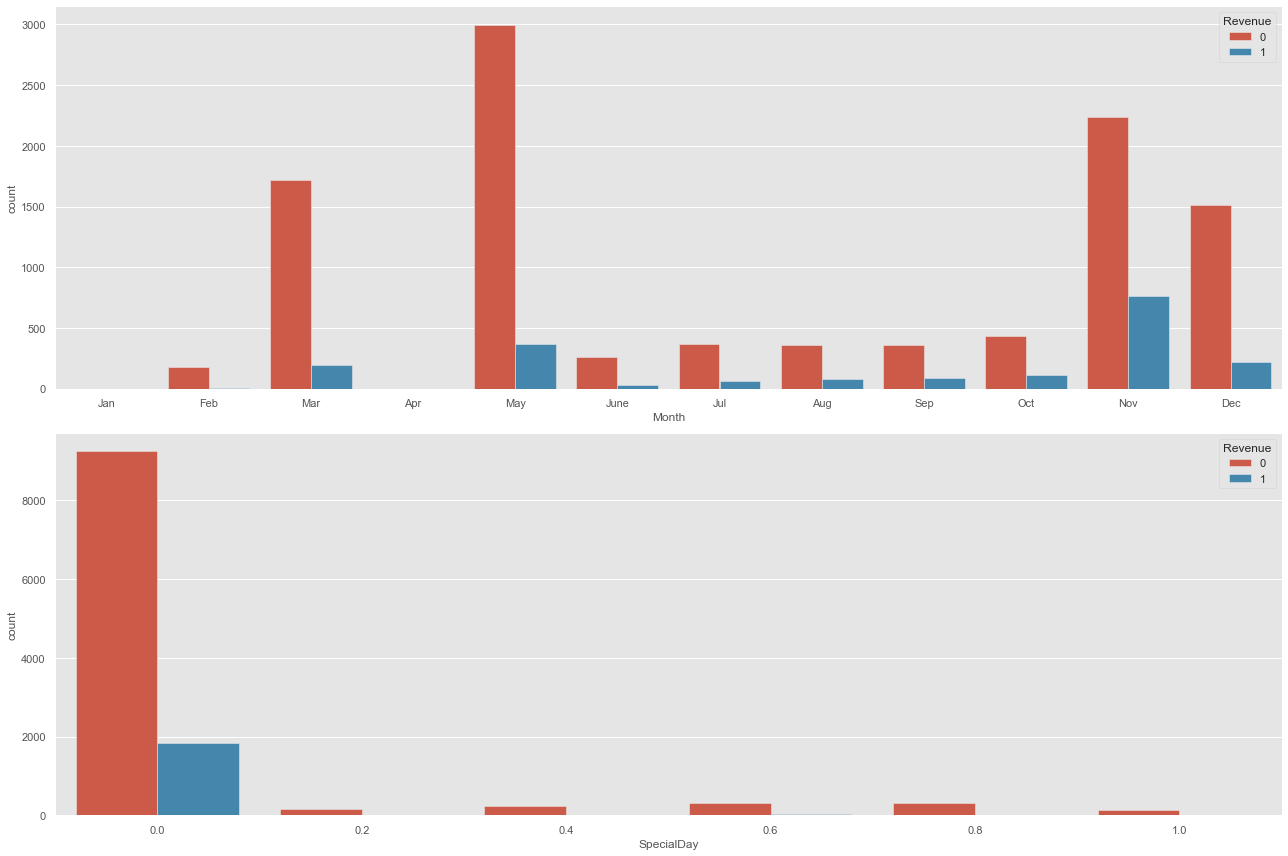

In [63]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=data_shoppers, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=data_shoppers, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

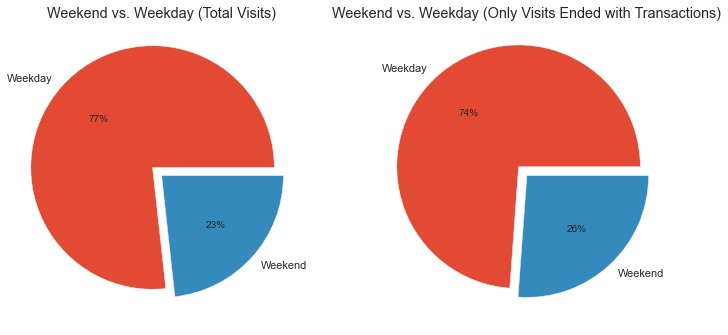

In [64]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(data_shoppers['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(data_shoppers[data_shoppers['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()


- On March and May, we have a lot of visits (May is the month with the highest number of visits), yet transactions made during   those 2 months are not on the same level.
- We have no visits at all during Jan nor Apr.
- Most transactions happen during the end of the year, with Nov as the month with the highest number of confirmed transactions.
- The closer the visit date to a special day (like black Friday, new year's, ... etc) the more likely it will end up in a         transaction.
- Most of transactions happen on special days (SpecialDay =0).
- It does not look like weekends affect the number of visits or transactions much, we can see only a slight increase in the       number of transactions happening on weekends compared to those on weekdays.

### Data Pre-Processing/Modeling 

- In this section we will make our data ready for model training. This will include:

- Transform Month and VisitorType columns into numerical (binary) values.
- Split data set into training, validation, and testing parts (60/40), while separating Revenue column, where it will be         used as our labels.


### Data Transformation/ Modeling 

In [65]:
# Transform/Encode Month and VisitorType Columns

data_shoppers = pd.concat([data_shoppers,pd.get_dummies(data_shoppers['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
data_shoppers = pd.concat([data_shoppers,pd.get_dummies(data_shoppers['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)

data_shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [66]:
data_shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
data_shoppers['Revenue'].values()

TypeError: 'numpy.ndarray' object is not callable

### Features Selection/ Data Split

In [68]:
# Assign y to our Target Feature and X to our Training Data
y = data_shoppers['Revenue']
X = data_shoppers.drop(['Revenue'], axis =1)

### Train Test Split

In [69]:
#split into training and validation sets using 60/40% split ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [70]:
print('\n',X_train.shape)
print('\n',X_test.shape)
print('\n',y_train.shape)
print('\n',y_test.shape)


 (7398, 28)

 (4932, 28)

 (7398,)

 (4932,)


### Modeling Building 

In [71]:
#import the libraries we will need
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [72]:
# Initializing DecisionTree
DTC_model = DecisionTreeClassifier()
# Initialize KNeighborsClassifier(KNN)
KNC_model = KNeighborsClassifier()
# Initialize RandomForestClassifier
RFC_model =  RandomForestClassifier()
# Initialize LogisticRegression
LR_model = LogisticRegression()
#Initialize Support Vector Machine - Classifier
SVMC_model = SVC()
# Initialize Gradient Boosting Classifier
GBC_model = GradientBoostingClassifier()

### Train and Test the models

In [73]:
# Fitting and Training with DecisionTreeClassifier()
DTC_model = DTC_model.fit(X_train, y_train)
DTC_preds = DTC_model.predict(X_test)

In [74]:
print("DecisionTree Accuracy is:", accuracy_score(DTC_preds,y_test))
print("DecisionTree Precision is:", precision_score(DTC_preds,y_test))
print("DecisionTree Recall is:", recall_score(DTC_preds,y_test))


DecisionTree Accuracy is: 0.8609083536090836
DecisionTree Precision is: 0.5740498034076016
DecisionTree Recall is: 0.5481852315394243


In [75]:
print('Decision Tree Classifier Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, DTC_preds))
print('F1 Score        : ', metrics.f1_score(y_test, DTC_preds))
print('Precision       : ', metrics.precision_score(y_test, DTC_preds))
print('Recall          : ', metrics.recall_score(y_test, DTC_preds))
print('Confusion Matrix:\n ', confusion_matrix(y_test, DTC_preds))

Decision Tree Classifier Initial Performance:
---------------------------------------
Accuracy        :  0.8609083536090836
F1 Score        :  0.5608194622279129
Precision       :  0.5481852315394243
Recall          :  0.5740498034076016
Confusion Matrix:
  [[3808  361]
 [ 325  438]]


In [76]:
# Fitting and Training with KNeighborsClassifier(KNN)
KNC_model = KNC_model.fit(X_train, y_train)
KNC_preds = KNC_model.predict(X_test)

In [77]:
print("Accuracy", accuracy_score(KNC_preds,y_test))
print("Precision", precision_score(KNC_preds,y_test))
print("Recall", recall_score(KNC_preds,y_test))

Accuracy 0.8603000811030008
Precision 0.28440366972477066
Recall 0.6027777777777777


In [78]:
print('K-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, KNC_preds))
print('F1 Score        : ', metrics.f1_score(y_test, KNC_preds))
print('Precision       : ', metrics.precision_score(y_test, KNC_preds))
print('Recall          : ', metrics.recall_score(y_test, KNC_preds))
print('Confusion Matrix:\n ', confusion_matrix(y_test, KNC_preds))

K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8603000811030008
F1 Score        :  0.38646482635796975
Precision       :  0.6027777777777777
Recall          :  0.28440366972477066
Confusion Matrix:
  [[4026  143]
 [ 546  217]]


In [79]:
# Fitting and Training with RandomForestClassifier
RFC_model = RFC_model.fit(X_train, y_train)
RFC_preds = RFC_model.predict(X_test)

In [80]:
print("Accuracy", accuracy_score(RFC_preds,y_test))
print("Precision", precision_score(RFC_preds,y_test))
print("Recall", recall_score(RFC_preds,y_test))

Accuracy 0.9075425790754258
Precision 0.583224115334207
Recall 0.7632933104631218


In [81]:
print('Random Forest Classifier Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, RFC_preds))
print('F1 Score        : ', metrics.f1_score(y_test, RFC_preds))
print('Precision       : ', metrics.precision_score(y_test, RFC_preds))
print('Recall          : ', metrics.recall_score(y_test, RFC_preds))
print('Confusion Matrix:\n ', confusion_matrix(y_test, RFC_preds))

Random Forest Classifier Initial Performance:
---------------------------------------
Accuracy        :  0.9075425790754258
F1 Score        :  0.6612184249628528
Precision       :  0.7632933104631218
Recall          :  0.583224115334207
Confusion Matrix:
  [[4031  138]
 [ 318  445]]


In [82]:
# Fitting and Training with LogisticRegression
LR_model = LR_model.fit(X_train, y_train)
LR_preds = LR_model.predict(X_test)

C:\Users\Babadele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
print("Accuracy", accuracy_score(LR_preds,y_test))
print("Precision", precision_score(LR_preds,y_test))
print("Recall", recall_score(LR_preds,y_test))


Accuracy 0.8860502838605029
Precision 0.40498034076015726
Recall 0.7410071942446043


In [87]:
print('Logistic Regression Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, LR_preds))
print('F1 Score        : ', metrics.f1_score(y_test, LR_preds))
print('Precision       : ', metrics.precision_score(y_test, LR_preds))
print('Recall          : ', metrics.recall_score(y_test, LR_preds))
print('Confusion Matrix:\n ', confusion_matrix(y_test, LR_preds))

Logistic Regression Initial Performance:
---------------------------------------
Accuracy        :  0.8860502838605029
F1 Score        :  0.523728813559322
Precision       :  0.7410071942446043
Recall          :  0.40498034076015726
Confusion Matrix:
  [[4061  108]
 [ 454  309]]


In [88]:
# Fitting and Training with Support Vector Machine - Classifier
SVMC_model = SVMC_model.fit(X_train, y_train)
SVMC_preds = SVMC_model.predict(X_test)

In [89]:
print("Accuracy", accuracy_score(SVMC_preds,y_test))
print("Precision", precision_score(SVMC_preds,y_test))
print("Recall", recall_score(SVMC_preds,y_test))

Accuracy 0.8469180859691808
Precision 0.011795543905635648
Recall 0.9


In [90]:
print('Support Vector Machine-Classifier Initial Performance:')
print('-------------------------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, LR_preds))
print('F1 Score        : ', metrics.f1_score(y_test, LR_preds))
print('Precision       : ', metrics.precision_score(y_test, LR_preds))
print('Recall          : ', metrics.recall_score(y_test, LR_preds))
print('Confusion Matrix:\n ', confusion_matrix(y_test, LR_preds))

Support Vector Machine-Classifier Initial Performance:
-------------------------------------------------------
Accuracy        :  0.8860502838605029
F1 Score        :  0.523728813559322
Precision       :  0.7410071942446043
Recall          :  0.40498034076015726
Confusion Matrix:
  [[4061  108]
 [ 454  309]]


In [91]:
# Fitting and Training with Gradient Boosting Classifier()
GBC_model = GBC_model.fit(X_train, y_train)
GBC_preds = GBC_model.predict(X_test)

In [92]:
print("Accuracy", accuracy_score(GBC_preds,y_test))
print("Precision", precision_score(GBC_preds,y_test))
print("Recall", recall_score(GBC_preds,y_test))

Accuracy 0.902676399026764
Precision 0.6068152031454783
Recall 0.7200622083981337


In [93]:
print('Gradient Boosting Classifier Initial Performance:')
print('-------------------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, GBC_preds))
print('F1 Score        : ', metrics.f1_score(y_test, GBC_preds))
print('Precision       : ', metrics.precision_score(y_test, GBC_preds))
print('Recall          : ', metrics.recall_score(y_test, GBC_preds))
print('Confusion Matrix:\n ', confusion_matrix(y_test, GBC_preds))

Gradient Boosting Classifier Initial Performance:
-------------------------------------------------
Accuracy        :  0.902676399026764
F1 Score        :  0.658605974395448
Precision       :  0.7200622083981337
Recall          :  0.6068152031454783
Confusion Matrix:
  [[3989  180]
 [ 300  463]]


### Print Report Summary 

In [94]:
#create list of your model names
models = [DTC_model,KNC_model,RFC_model,LR_model,SVMC_model,GBC_model]

In [95]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction, y_test))
    #print(classification_report(prediction,y_valid)) #use this later
    

In [96]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For DecisionTreeClassifier, Accuracy score is 0.8611111111111112 

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4130
           1       0.58      0.55      0.56       802

    accuracy                           0.86      4932
   macro avg       0.74      0.74      0.74      4932
weighted avg       0.86      0.86      0.86      4932


For KNeighborsClassifier, Accuracy score is 0.8603000811030008 

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4572
           1       0.28      0.60      0.39       360

    accuracy                           0.86      4932
   macro avg       0.63      0.74      0.65      4932
weighted avg       0.92      0.86      0.88      4932


For RandomForestClassifier, Accuracy score is 0.9055150040551501 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4353
           1       0.57      0.76  

C:\Users\Babadele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, Accuracy score is 0.8860502838605029 

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      4515
           1       0.40      0.74      0.52       417

    accuracy                           0.89      4932
   macro avg       0.69      0.82      0.73      4932
weighted avg       0.93      0.89      0.90      4932


For SVC, Accuracy score is 0.8469180859691808 

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      4922
           1       0.01      0.90      0.02        10

    accuracy                           0.85      4932
   macro avg       0.51      0.87      0.47      4932
weighted avg       1.00      0.85      0.92      4932


For GradientBoostingClassifier, Accuracy score is 0.9028791565287916 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      4290
           1       0.61      0.72      0.66       64

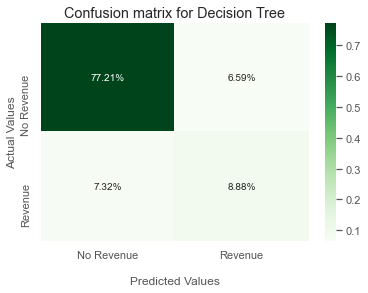

In [97]:
c_matrix = confusion_matrix(DTC_preds, y_test)

# Generating confusion matrix with percentages
ax = sns.heatmap(c_matrix/np.sum(c_matrix), annot=True,
          fmt='.2%', cmap='Greens')

ax.set_title('Confusion matrix for Decision Tree');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels- List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Revenue', 'Revenue'])
ax.yaxis.set_ticklabels(['No Revenue', 'Revenue'])

## Display the Visualization of the Confusion Matrix
plt.show()

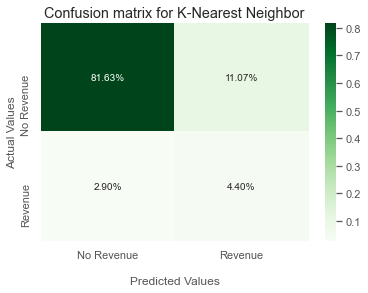

In [107]:
c_matrix = confusion_matrix(KNC_preds, y_test)

# Generating confusion matrix with percentages
ax = sns.heatmap(c_matrix/np.sum(c_matrix), annot=True,
          fmt='.2%', cmap='Greens')

ax.set_title('Confusion matrix for K-Nearest Neighbor');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels- List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Revenue', 'Revenue'])
ax.yaxis.set_ticklabels(['No Revenue', 'Revenue'])

## Display the Visualization of the Confusion Matrix
plt.show()

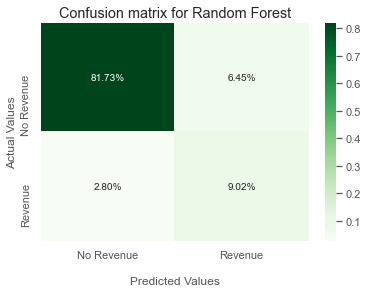

In [103]:
c_matrix = confusion_matrix(RFC_preds, y_test)

# Generating confusion matrix with percentages
ax = sns.heatmap(c_matrix/np.sum(c_matrix), annot=True,
          fmt='.2%', cmap='Greens')

ax.set_title('Confusion matrix for Random Forest');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels- List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Revenue', 'Revenue'])
ax.yaxis.set_ticklabels(['No Revenue', 'Revenue'])

## Display the Visualization of the Confusion Matrix
plt.show()

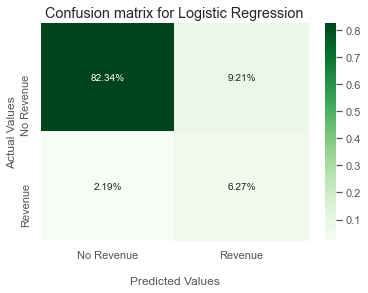

In [108]:
c_matrix = confusion_matrix(LR_preds, y_test)

# Generating confusion matrix with percentages
ax = sns.heatmap(c_matrix/np.sum(c_matrix), annot=True,
          fmt='.2%', cmap='Greens')

ax.set_title('Confusion matrix for Logistic Regression');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels- List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Revenue', 'Revenue'])
ax.yaxis.set_ticklabels(['No Revenue', 'Revenue'])

## Display the Visualization of the Confusion Matrix
plt.show()


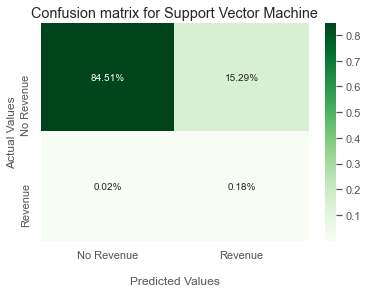

In [111]:
c_matrix = confusion_matrix(SVMC_preds, y_test)

# Generating confusion matrix with percentages
ax = sns.heatmap(c_matrix/np.sum(c_matrix), annot=True,
          fmt='.2%', cmap='Greens')

ax.set_title('Confusion matrix for Support Vector Machine');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels- List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Revenue', 'Revenue'])
ax.yaxis.set_ticklabels(['No Revenue', 'Revenue'])

## Display the Visualization of the Confusion Matrix
plt.show()


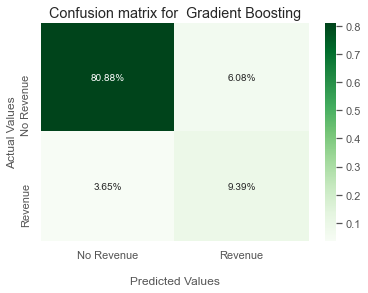

In [110]:
c_matrix = confusion_matrix(GBC_preds, y_test)

# Generating confusion matrix with percentages
ax = sns.heatmap(c_matrix/np.sum(c_matrix), annot=True,
          fmt='.2%', cmap='Greens')

ax.set_title('Confusion matrix for  Gradient Boosting');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels- List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Revenue', 'Revenue'])
ax.yaxis.set_ticklabels(['No Revenue', 'Revenue'])

## Display the Visualization of the Confusion Matrix
plt.show()


In [113]:
c_matrix = confusion_matrix(DTC_preds, y_test)
c_matrix1 = confusion_matrix(RFC_preds, y_test)
c_matrix2 = confusion_matrix(KNC_preds, y_test)
c_matrix3 = confusion_matrix(LR_preds, y_test)


ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

c_matrix = confusion_matrix(DTC_preds, y_test)
# Generating confusion matrix with percentages
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True,
          fmt='.2%', cmap='Greens',ax=ax1)
sns.heatmap(c_matrix1/np.sum(c_matrix1), annot=True,
          fmt='.2%', cmap='Greens', ax=ax2)
sns.heatmap(c_matrix2/np.sum(c_matrix2), annot=True,
          fmt='.2%', cmap='Greens', ax=ax2)
sns.heatmap(c_matrix3/np.sum(c_matrix3), annot=True,
          fmt='.2%', cmap='Greens', ax=ax3)


<ipython-input-113-c817ba4ca4ee>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(2, 2, 1)
<ipython-input-113-c817ba4ca4ee>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(2, 2, 2)
<ipython-input-113-c817ba4ca4ee>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will 

<AxesSubplot:>

### Observation
From the Analysis Above,Our Best Performing Model Is Gradient Boosting with the following Results:

- Accuracy    0.902676399026764
- Precision   0.7200622083981337
- Recall      0.6068152031454783
- F1 Score    0.658605974395448

### Checking Feature Importance To Best Model

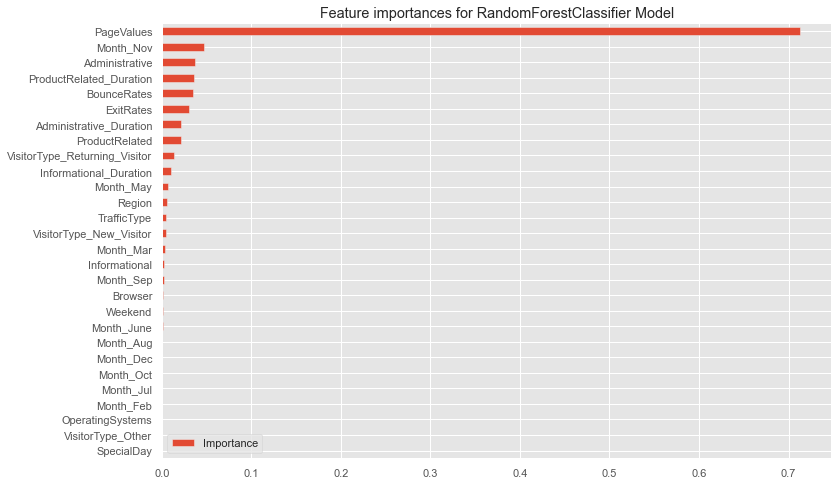

In [142]:
#get feature importances
GBC_importances = pd.DataFrame(data = GBC_model.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
GBC_importances.sort_values(by='Importance').plot.barh(figsize=(12,8))

plt.title('Feature importances for RandomForestClassifier Model')
plt.show()

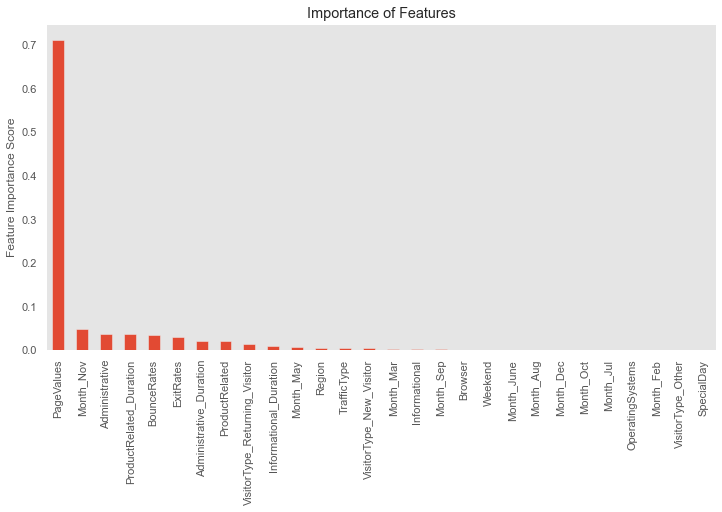

In [129]:
# We now plot how our best Gradient Boosting  classifier sees the importance of different features in the dataset.

feat_imp = pd.Series(GBC_model.feature_importances_, list(X_test)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()


### Observation

As expected, PageValues is the most important feature in our dataset, since it is the feature with the highest level of corrolation with our labels (Revenue). In general, this feature importance graph agrees with our corrlation analysis of the dataset.



### Training Best Model with Important Features

In [144]:
# Select top 10 important Features
GBC_importances[:10].sort_values(by='Importance').index.values

array(['SpecialDay', 'Informational', 'Informational_Duration',
       'ProductRelated', 'Administrative_Duration', 'ExitRates',
       'BounceRates', 'ProductRelated_Duration', 'Administrative',
       'PageValues'], dtype=object)

In [145]:
#create a new X train with only 7 features
X_train2 = X_train[['SpecialDay', 'Informational', 'Informational_Duration',
       'ProductRelated', 'Administrative_Duration', 'ExitRates',
       'BounceRates', 'ProductRelated_Duration', 'Administrative',
       'PageValues']]
X_train2.head()

,SpecialDay,Informational,Informational_Duration,ProductRelated,Administrative_Duration,ExitRates,BounceRates,ProductRelated_Duration,Administrative,PageValues
8083,0.0,0,0.0,3,0.000000,0.066667,0.000000,61.750000,0,0.0
8528,0.0,0,0.0,4,0.000000,0.050000,0.000000,214.333333,0,0.0
6649,0.0,0,0.0,3,180.066667,0.007143,0.000000,111.800000,6,0.0
3090,0.8,0,0.0,6,0.000000,0.188889,0.183333,30.000000,0,0.0
5060,0.0,0,0.0,21,0.000000,0.012500,0.000000,464.583333,0,0.0


In [147]:
#create a new X_valid with only 10 features so we can predict on them
X_test2 = X_test[['SpecialDay', 'Informational', 'Informational_Duration',
       'ProductRelated', 'Administrative_Duration', 'ExitRates',
       'BounceRates', 'ProductRelated_Duration', 'Administrative',
       'PageValues']]

In [154]:
#train and predict
GBC_model.fit(X_train2,y_train)
GBC_preds2 = GBC_model.predict(X_test2)

# Print result based on 10 important features

print("Accuracy", accuracy_score(pred2,y_test))
print("Precision", precision_score(pred2,y_test))
print("Recall", recall_score(pred2,y_test))
print('------------------------------------------------------\n')

print('Gradient Boost: Final  ClassificationPerformance test:')
print('--------------------------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, GBC_preds2))
print('F1 Score        : ', metrics.f1_score(y_test, GBC_preds2))
print('Precision       : ', metrics.precision_score(y_test, GBC_preds2))
print('Recall          : ', metrics.recall_score(y_test, GBC_preds2))
print('Confusion Matrix:\n ', confusion_matrix(y_test, GBC_preds2))

Accuracy 0.8955798864557989
Precision 0.583224115334207
Recall 0.6931464174454829
------------------------------------------------------

Gradient Boost: Final  ClassificationPerformance test:
--------------------------------------------------------
Accuracy        :  0.8953771289537713
F1 Score        :  0.6330014224751067
Precision       :  0.6920684292379471
Recall          :  0.583224115334207
Confusion Matrix:
  [[3971  198]
 [ 318  445]]


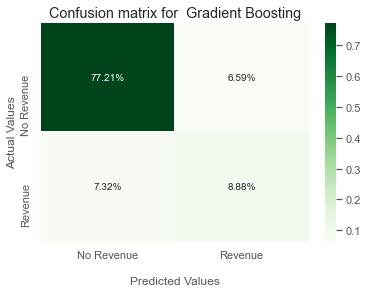

In [155]:
# Generating confusion matrix with percentages
ax = sns.heatmap(c_matrix/np.sum(c_matrix), annot=True,
          fmt='.2%', cmap='Greens')

ax.set_title('Confusion matrix for  Gradient Boosting');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels- List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Revenue', 'Revenue'])
ax.yaxis.set_ticklabels(['No Revenue', 'Revenue'])

## Display the Visualization of the Confusion Matrix
plt.show()

### Cross Validation Evaluation
Evaluate our models using k-fold cross-validation

In [163]:
# Import the necessary Libraries 
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [164]:
#create list of your model names
models = [DTC_model,KNC_model,RFC_model,LR_model,SVMC_model,GBC_model]

In [165]:

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [168]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    #print('Accuracy: %.3f' % (mean(scores)))
    print(scores)
    print(model.__class__.__name__, 'Accuracy: %.3f' % (mean(scores)))

In [169]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model,X,y)
    

Accuracy: 0.859
[0.86374696 0.86699108 0.84428224 0.86374696 0.85725872 0.87510138
 0.84752636 0.85969181 0.85969181 0.85077048]
DecisionTreeClassifier Accuracy: 0.859
Accuracy: 0.861
[0.86131387 0.8702352  0.86374696 0.86131387 0.85158151 0.86536902
 0.86942417 0.85482563 0.85320357 0.86050284]
KNeighborsClassifier Accuracy: 0.861
Accuracy: 0.902
[0.90429846 0.90510949 0.89862125 0.89294404 0.90105434 0.91565288
 0.89862125 0.90348743 0.90510949 0.89943228]
RandomForestClassifier Accuracy: 0.902
Accuracy: 0.882
[0.88888889 0.88888889 0.88321168 0.88158962 0.8621249  0.89699919
 0.8864558  0.88077859 0.87429035 0.87510138]
LogisticRegression Accuracy: 0.882
Accuracy: 0.848
[0.85644769 0.86536902 0.84184915 0.84752636 0.8459043  0.8540146
 0.85725872 0.83860503 0.84266018 0.83373885]
SVC Accuracy: 0.848
Accuracy: 0.902
[0.9107867  0.89943228 0.89051095 0.90186537 0.89862125 0.918897
 0.90429846 0.89699919 0.89943228 0.90024331]
GradientBoostingClassifier Accuracy: 0.902


### Conclusion

In this project, we used Online Shoppers Intention dataset to build models that can classify website visitor, and predict which of them is likely going to make a purchase on the website. Six different learning classifiers (Decision Tree, K-Nearest Neighbor, Logistic Regression, Random Forest and Gradiant Boosting) were tested and optimized, and we have achieved the best classification performance using Gradient Boost classifier, followed by random Forest, and then Support Vector Machine.

The best classification performance:

Accuracy: 91%

F1 Score: 0.66

Note: There is a clear difference of classification performance between the 2 classes, that is meanly due to the unbalanced nature of our dataset, where around 85% of our data points belong to 1 class, and less than 15% belong to the other.

For future work, different techniques can be considered for mitigating the effects of unbalanced classes.